In [1]:
import time
from itertools import product
from pathlib import Path
from typing import List

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import src.binary_puzzle.puzzle as pzl

from src.binary_puzzle import webpuzzle
from src.binary_puzzle import solver
from src.binary_puzzle.puzzle import BinaryPuzzle

In [2]:
N_PUZZLES = 10
PUZZLE_SIZES = [6, 8, 10, 12, 14]
PUZZLE_DIFFICULTIES = list(webpuzzle.Difficulty)

In [3]:
def measure_time(fn, *params, **kwargs):
    start_time = time.perf_counter()
    result = fn(*params, **kwargs)
    run_time = time.perf_counter() - start_time
    return result, run_time

def analyze_puzzles(n_puzzles: int = N_PUZZLES, puzzle_sizes: List[int] = PUZZLE_SIZES,
                    puzzle_difficulties: List[webpuzzle.Difficulty] = PUZZLE_DIFFICULTIES,
                    output: str = 'puzzles') -> pd.DataFrame:
    df_result = []

    for size, difficulty in product(puzzle_sizes, puzzle_difficulties):
        for idx in range(n_puzzles):
            outpath = Path(f'{output}/{size}x{size}/{difficulty.name.lower()}/{idx+1}')

            input_puzzle = outpath / 'puzzle.csv'
            if input_puzzle.exists():
                puzzle = pzl.from_csv(input_puzzle)
            else:
                puzzle = BinaryPuzzle(webpuzzle.get(idx=idx, size=size, difficulty=difficulty))
                

            solution, run_time_any = measure_time(solver.solve, puzzle)
            solutions, run_time_all = measure_time(solver.solve_all, puzzle)

            df_result.append(pd.Series({'size': size, 'difficulty': difficulty.name.lower(), 'idx': idx+1,
                                        'puzzle': puzzle, 'solution_counts': len(solutions),
                                        'solution': solution, 'solution_validity': solution.check(),
                                        'run_time_any': run_time_any, 'solutions': solutions,
                                        'solutions_validity': [s.check() for s in solutions],
                                        'run_time_all': run_time_all}))
                    
            if output:
                puzzle.to_csv(input_puzzle)
                solution.to_csv(outpath / 'solution.csv')
                    
    return pd.DataFrame(df_result)


df = analyze_puzzles()

In [4]:
df

,size,difficulty,idx,puzzle,solution_counts,solution,solution_validity,run_time_any,solutions,solutions_validity,run_time_all
0,6,easy,1,┌───┬───┬───┬───┬───┬───┐\n│ 1 │ │ │ 0 │ ...,1,┌───┬───┬───┬───┬───┬───┐\n│ 1 │ 0 │ 1 │ 0 │ 1...,True,0.064076,[┌───┬───┬───┬───┬───┬───┐\n│ 1 │ 0 │ 1 │ 0 │ ...,[True],0.067776
1,6,easy,2,┌───┬───┬───┬───┬───┬───┐\n│ │ │ 0 │ │ ...,1,┌───┬───┬───┬───┬───┬───┐\n│ 1 │ 0 │ 0 │ 1 │ 0...,True,0.102813,[┌───┬───┬───┬───┬───┬───┐\n│ 1 │ 0 │ 0 │ 1 │ ...,[True],0.522752
2,6,easy,3,┌───┬───┬───┬───┬───┬───┐\n│ │ 0 │ │ │ ...,1,┌───┬───┬───┬───┬───┬───┐\n│ 1 │ 0 │ 0 │ 1 │ 1...,True,0.106327,[┌───┬───┬───┬───┬───┬───┐\n│ 1 │ 0 │ 0 │ 1 │ ...,[True],0.250724
3,6,easy,4,┌───┬───┬───┬───┬───┬───┐\n│ 1 │ │ 1 │ 1 │ ...,1,┌───┬───┬───┬───┬───┬───┐\n│ 1 │ 0 │ 1 │ 1 │ 0...,True,0.200965,[┌───┬───┬───┬───┬───┬───┐\n│ 1 │ 0 │ 1 │ 1 │ ...,[True],0.304084
4,6,easy,5,┌───┬───┬───┬───┬───┬───┐\n│ 0 │ 0 │ │ │ 1...,1,┌───┬───┬───┬───┬───┬───┐\n│ 0 │ 0 │ 1 │ 0 │ 1...,True,0.045071,[┌───┬───┬───┬───┬───┬───┐\n│ 0 │ 0 │ 1 │ 0 │ ...,[True],0.070433
...,...,...,...,...,...,...,...,...,...,...,...
195,14,very_hard,6,┌───┬───┬───┬───┬───┬───┬───┬───┬───┬───┬───┬─...,1,┌───┬───┬───┬───┬───┬───┬───┬───┬───┬───┬───┬─...,True,0.246474,[┌───┬───┬───┬───┬───┬───┬───┬───┬───┬───┬───┬...,[True],0.407456
196,14,very_hard,7,┌───┬───┬───┬───┬───┬───┬───┬───┬───┬───┬───┬─...,1,┌───┬───┬───┬───┬───┬───┬───┬───┬───┬───┬───┬─...,True,0.153495,[┌───┬───┬───┬───┬───┬───┬───┬───┬───┬───┬───┬...,[True],0.375604
197,14,very_hard,8,┌───┬───┬───┬───┬───┬───┬───┬───┬───┬───┬───┬─...,1,┌───┬───┬───┬───┬───┬───┬───┬───┬───┬───┬───┬─...,True,0.087771,[┌───┬───┬───┬───┬───┬───┬───┬───┬───┬───┬───┬...,[True],0.145493
198,14,very_hard,9,┌───┬───┬───┬───┬───┬───┬───┬───┬───┬───┬───┬─...,1,┌───┬───┬───┬───┬───┬───┬───┬───┬───┬───┬───┬─...,True,0.075654,[┌───┬───┬───┬───┬───┬───┬───┬───┬───┬───┬───┬...,[True],0.296559


In [5]:
print("Number of puzzles", len(df))

Number of puzzles 200


In [6]:
print("Distribution of solution counts")
df.value_counts('solution_counts', normalize=True)

Distribution of solution counts


solution_counts
1    1.0
Name: proportion, dtype: float64

In [7]:
print(df.iloc[0].puzzle)

┌───┬───┬───┬───┬───┬───┐
│ 1 │   │   │ 0 │   │   │
├───┼───┼───┼───┼───┼───┤
│   │   │ 0 │ 0 │   │ 1 │
├───┼───┼───┼───┼───┼───┤
│   │ 0 │ 0 │   │   │ 1 │
├───┼───┼───┼───┼───┼───┤
│   │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┤
│ 0 │ 0 │   │ 1 │   │   │
├───┼───┼───┼───┼───┼───┤
│   │ 1 │   │   │ 0 │ 0 │
└───┴───┴───┴───┴───┴───┘



In [8]:
print(df.iloc[0].solution)

┌───┬───┬───┬───┬───┬───┐
│ 1 │ 0 │ 1 │ 0 │ 1 │ 0 │
├───┼───┼───┼───┼───┼───┤
│ 0 │ 1 │ 0 │ 0 │ 1 │ 1 │
├───┼───┼───┼───┼───┼───┤
│ 1 │ 0 │ 0 │ 1 │ 0 │ 1 │
├───┼───┼───┼───┼───┼───┤
│ 0 │ 1 │ 1 │ 0 │ 1 │ 0 │
├───┼───┼───┼───┼───┼───┤
│ 0 │ 0 │ 1 │ 1 │ 0 │ 1 │
├───┼───┼───┼───┼───┼───┤
│ 1 │ 1 │ 0 │ 1 │ 0 │ 0 │
└───┴───┴───┴───┴───┴───┘



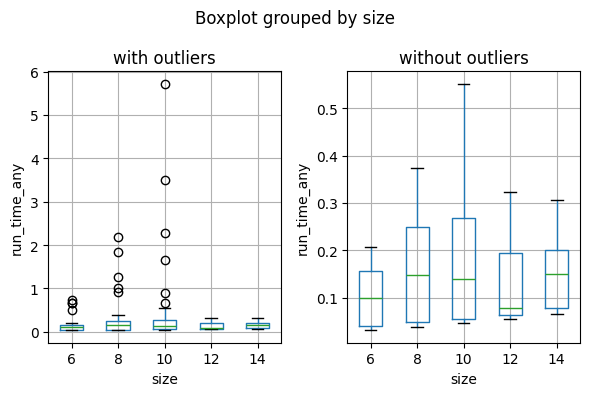

In [9]:
def plot_boxplot_outliers(df, x, by=None, figsize=(6, 4)):
    fig, axs = plt.subplots(1, 2, figsize=figsize)
    df.boxplot(x, by=by, ax=axs[0])
    df.boxplot(x, by=by, showfliers=False, ax=axs[1])

    axs[0].set_title("with outliers")
    axs[1].set_title("without outliers")
    if by:
        axs[0].set_ylabel(x)
        axs[1].set_ylabel(x)
    fig.tight_layout()

    return fig, axs

fig, axs = plot_boxplot_outliers(df, 'run_time_any', 'size')

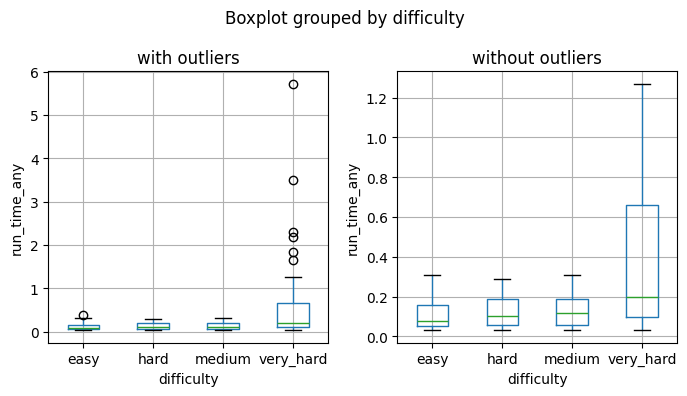

In [10]:
fig, axs = plot_boxplot_outliers(df, 'run_time_any', 'difficulty', figsize=(7,4))

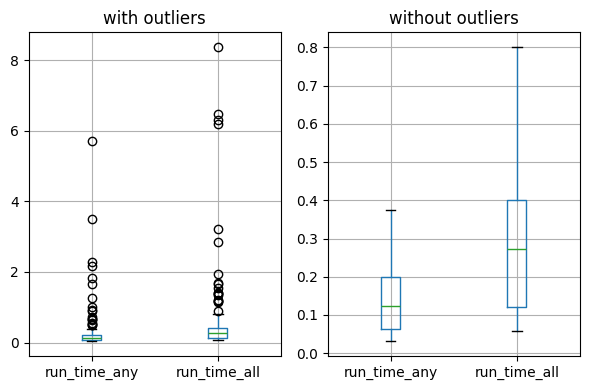

In [11]:
fig, axs = plot_boxplot_outliers(df, ['run_time_any', 'run_time_all'])

Text(0.5, 1.0, 'CDF run_time_any')

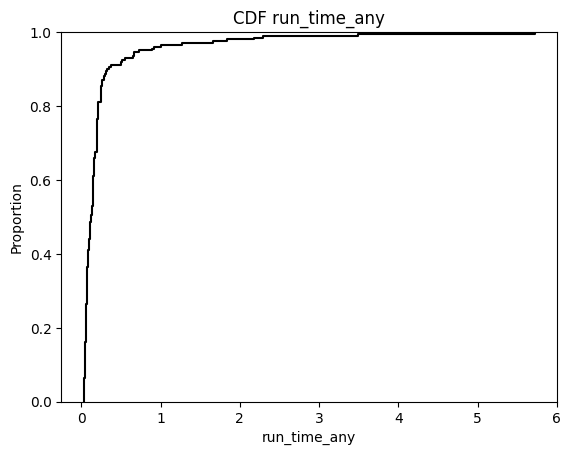

In [12]:
ax = sns.ecdfplot(data=df, x='run_time_any', stat='proportion', color='k')
ax.set_title('CDF run_time_any')